<a href="https://colab.research.google.com/github/harshsinha-12/Stock-Market-Analysis/blob/main/Genralized_Relative_Index_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment
Time Series plot of NIFTY Index data

# Data Acquisition
We were told to install nsepython but as given on the website the nsepython library cant be executed on a server like Google Colab hence we use the NSEPython Server Edition

Intalling nsepython package for server execution environment

In [23]:
pip install nsepythonserver

 Import necessary libraries

In [16]:
from nsepythonserver import *
from datetime import datetime
import pandas as pd
from google.colab import files


Globally defining variables for start date and end date so we can change the time period to analyse the relative returns accordingly

In [17]:
start_date = "01-Oct-2013"
end_date = "09-Oct-2023"

In [18]:
# Define Index Names
Index_1 = "NIFTY 50"
Index_2 = "NIFTY SMALLCAP 100"
Index_3 = "NIFTY MIDCAP 150"

In [25]:
# Fetch data for each index
data_1 = index_total_returns(Index_1, start_date, end_date)
data_2 = index_total_returns(Index_2, start_date, end_date)
data_3 = index_total_returns(Index_3, start_date, end_date)

Data Cleaning and Data Preparation
For every acquired timeseries index data: Compute the relative percent change in the index return value from the start date.

In [26]:
def compute_relative_percent_change(data):
    data['TotalReturnsIndex'] = data['TotalReturnsIndex'].astype(float)
    start_value = data['TotalReturnsIndex'].iloc[-1]
    data['relative_percent_change'] = 100 * (data['TotalReturnsIndex'] - start_value) / start_value
    return data
# Apply relative percent change computation to each data
data_1 = compute_relative_percent_change(data_1)
data_2 = compute_relative_percent_change(data_2)
data_3 = compute_relative_percent_change(data_3)


In [27]:
# Combine the data
combined_data = pd.DataFrame()
combined_data['Date'] = data_1['Date']
combined_data[Index_1] = data_1['relative_percent_change']
combined_data[Index_2] = data_2['relative_percent_change']
combined_data[Index_3] = data_3['relative_percent_change']
combined_data.head()

,Date,NIFTY 50,NIFTY SMALLCAP 100,NIFTY MIDCAP 150
0,06 Oct 2023,283.736946,415.863394,647.064652
1,05 Oct 2023,281.632455,411.770775,642.709102
2,04 Oct 2023,279.491626,408.585664,643.168620
3,03 Oct 2023,281.300629,415.023098,652.865078
4,29 Sep 2023,283.439993,412.302784,650.910153


## Data Visualization


In [28]:
import plotly.express as px

# Convert 'Date' column to datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

fig = px.line(combined_data, x='Date', y=[Index_1, Index_2, Index_3])

# Customizing the plot to match the sample
fig.update_layout(
    title={
        'text': 'Percent Change in Index Funds since Start Date',
        'x': 0.5,  # Center the title
        'xanchor': 'center'
    },
    xaxis_title='Date',
    yaxis_title='Relative Percentage Change(%)',
    legend_title_text='Index Funds',
    legend=dict(
        yanchor="top",
        y=0.97,
        xanchor="left",
        x=0.01
    )

)


# Customizing line styles and colors
fig.update_traces(selector=dict(name='Index_1'), line=dict(color='red'))
fig.update_traces(selector=dict(name='Index_2'), line=dict(color='blue'))
fig.update_traces(selector=dict(name='Index_3'), line=dict(color='green'))
# fig.update_traces(selector=dict(name='NIFTY SMALLCAP 100'), line=dict(color='magenta'))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

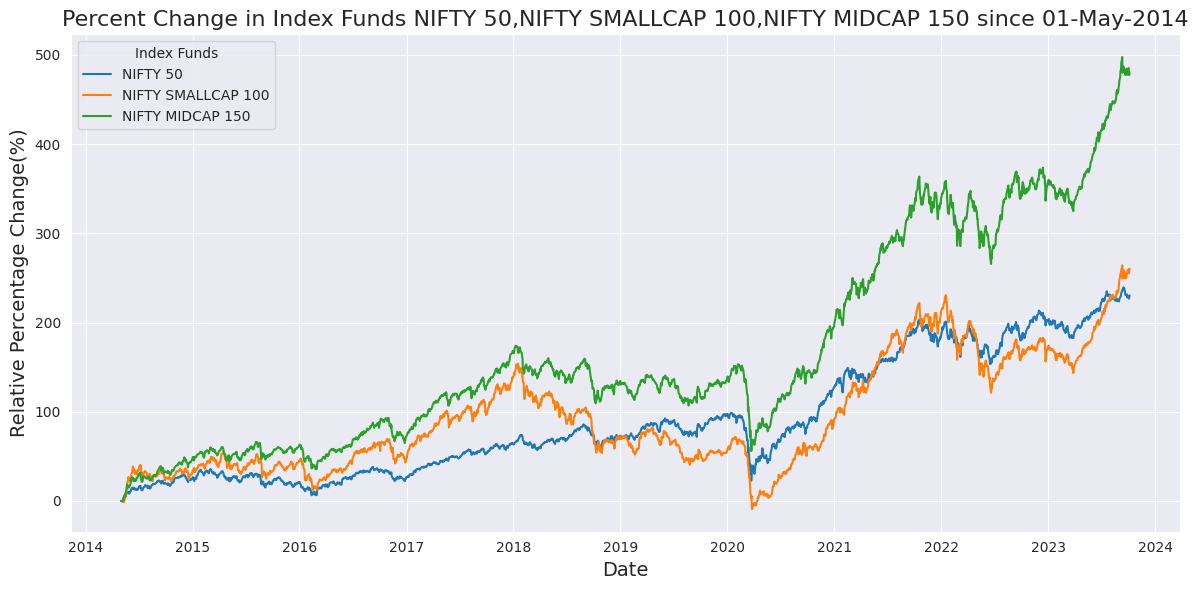

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

# Set the style of the plot to have darker grid lines
sns.set_style("darkgrid")

# Create the line plot
plt.figure(figsize=(12,6))
# Create line plots
sns.lineplot(x='Date', y=Index_1, data=combined_data, label=Index_1)
sns.lineplot(x='Date', y=Index_2, data=combined_data, label=Index_2)
sns.lineplot(x='Date', y=Index_3, data=combined_data, label=Index_3)

# Adding titles and labels
plt.title('Percent Change in Index Funds '+str(Index_1)+","+str(Index_2)+","+str(Index_3)+' since '+str(start_date), loc='center', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Relative Percentage Change(%)', fontsize=14)


# Adding legend
plt.legend(title='Index Funds', loc='upper left')

# Display the plot
plt.tight_layout()
plt.savefig(str(Index_1)+","+str(Index_2)+","+str(Index_3)+" starting from "+str(start_date)+".png")
files.download(str(Index_1)+","+str(Index_2)+","+str(Index_3)+" starting from "+str(start_date)+".png")
plt.show()
